## Get weather forecast data from API

In [144]:
import numpy as np
a = np.array([33.93816,-118.3865])
b = np.array([33.90000,-117.2500])
c = np.array([33.62667,-116.1597])
d = np.array([34.74106, -118.2186])
e = np.array([34.02354, -118.2912])
dist = np.linalg.norm(a-e)
dist

0.12795246930011892

In [145]:
import forecastio
import datetime
import csv
import time

def get_forecast(key, end_date, num_day):
    '''link to the Forecast.io API: https://developer.forecast.io/
       Forecast.io Python Wrapper: https://github.com/ZeevG/python-forecast.io'''


    api_key = key
    #"3c3d34cf5119015030b34055f893f756"
    #"cbc5a3aaa1aaafd95a0d90c49494a86f"

    '''Locations for weather forecast
        If this list is updated, remember to update the dict keys as well
    '''

    locations = ['TRM']
    lats = [33.62667]
    lngs = [-116.1597]

    # locations = ['LAX', 'RIV', 'TRM', 'WJF', 'CQT']
    # lats = [33.93816, 33.90000, 33.62667, 34.74106, 34.02354]
    # lngs = [-118.3865, -117.2500, -116.1597, -118.2186, -118.2912]

    ''' Get the current time to add to the forecast record '''
    # now = datetime.datetime.now()
    # ForecastTime = now.strftime("%Y-%m-%d %H:%M")

    ''' Set the start date to either a specific day or a specific lag '''
    numdays = num_day # Set the number of days to pull in the future #2100

    '''Set the Date array'''
    start = datetime.datetime.strptime("1/1/14 0:00", "%d/%m/%y %H:%M")
    end = datetime.datetime.strptime(end_date, "%d/%m/%y %H:%M")
    middle = datetime.datetime.strptime("1/5/17 0:00", "%d/%m/%y %H:%M")

    dateList = []
    for x in range (0, numdays):
        dateList.append(end - datetime.timedelta(days = x))
    print(dateList)  
    '''Loop through the locations and dates'''
    data = []
    error = []

    for i in range (len(locations)):
        for dates in dateList:
            try: 
                forecast = forecastio.load_forecast(api_key, lats[i], lngs[i], dates)
                byHour = forecast.hourly()
            except:
                error.extend([locations[i],lats[i], lngs[i], dates])
                pass



            for hourlyData in byHour.data:
                try:
                    data.append({
                            'Time':hourlyData.time.strftime("%Y-%m-%d %H:%M:%S"),
                            'Location':locations[i], 
                            'Temp':hourlyData.temperature,
                            'precipProbability': hourlyData.precipProbability,
                            'humidity': hourlyData.humidity,
                            'windSpeed': hourlyData.windSpeed,
                            'visibility': hourlyData.visibility
                            }) 
                except:
                    pass
    return pd.DataFrame(data).groupby('Time').agg('mean')

In [146]:
df_170104_170501 = get_forecast("8318fe3ed766eebffa51e95dcd15634f","5/11/19 0:00",2135)

[datetime.datetime(2019, 11, 5, 0, 0), datetime.datetime(2019, 11, 4, 0, 0), datetime.datetime(2019, 11, 3, 0, 0), datetime.datetime(2019, 11, 2, 0, 0), datetime.datetime(2019, 11, 1, 0, 0), datetime.datetime(2019, 10, 31, 0, 0), datetime.datetime(2019, 10, 30, 0, 0), datetime.datetime(2019, 10, 29, 0, 0), datetime.datetime(2019, 10, 28, 0, 0), datetime.datetime(2019, 10, 27, 0, 0), datetime.datetime(2019, 10, 26, 0, 0), datetime.datetime(2019, 10, 25, 0, 0), datetime.datetime(2019, 10, 24, 0, 0), datetime.datetime(2019, 10, 23, 0, 0), datetime.datetime(2019, 10, 22, 0, 0), datetime.datetime(2019, 10, 21, 0, 0), datetime.datetime(2019, 10, 20, 0, 0), datetime.datetime(2019, 10, 19, 0, 0), datetime.datetime(2019, 10, 18, 0, 0), datetime.datetime(2019, 10, 17, 0, 0), datetime.datetime(2019, 10, 16, 0, 0), datetime.datetime(2019, 10, 15, 0, 0), datetime.datetime(2019, 10, 14, 0, 0), datetime.datetime(2019, 10, 13, 0, 0), datetime.datetime(2019, 10, 12, 0, 0), datetime.datetime(2019, 10, 1

In [167]:
df_140101_190617

,Temp,precipProbability,humidity,windSpeed,visibility
Time,,,,,
2014-01-01 08:00:00,48.65,0.00,0.22,1.94,3.662
2014-01-01 09:00:00,42.79,0.00,0.42,4.61,7.995
2014-01-01 10:00:00,45.78,0.00,0.26,2.90,9.997
2014-01-01 11:00:00,46.45,0.00,0.23,3.27,3.662
2014-01-01 12:00:00,45.00,0.00,0.36,3.33,9.997
...,...,...,...,...,...
2016-09-21 02:00:00,71.61,1.00,0.94,2.44,9.997
2016-09-21 03:00:00,71.61,1.00,0.88,5.74,9.997
2016-09-21 04:00:00,71.61,1.00,0.88,3.22,9.997


In [150]:
df_140101_190617 = get_forecast("be3747f253fb2621d419696f432f2a6c","17/6/19 0:00",1994)

[datetime.datetime(2019, 6, 17, 0, 0), datetime.datetime(2019, 6, 16, 0, 0), datetime.datetime(2019, 6, 15, 0, 0), datetime.datetime(2019, 6, 14, 0, 0), datetime.datetime(2019, 6, 13, 0, 0), datetime.datetime(2019, 6, 12, 0, 0), datetime.datetime(2019, 6, 11, 0, 0), datetime.datetime(2019, 6, 10, 0, 0), datetime.datetime(2019, 6, 9, 0, 0), datetime.datetime(2019, 6, 8, 0, 0), datetime.datetime(2019, 6, 7, 0, 0), datetime.datetime(2019, 6, 6, 0, 0), datetime.datetime(2019, 6, 5, 0, 0), datetime.datetime(2019, 6, 4, 0, 0), datetime.datetime(2019, 6, 3, 0, 0), datetime.datetime(2019, 6, 2, 0, 0), datetime.datetime(2019, 6, 1, 0, 0), datetime.datetime(2019, 5, 31, 0, 0), datetime.datetime(2019, 5, 30, 0, 0), datetime.datetime(2019, 5, 29, 0, 0), datetime.datetime(2019, 5, 28, 0, 0), datetime.datetime(2019, 5, 27, 0, 0), datetime.datetime(2019, 5, 26, 0, 0), datetime.datetime(2019, 5, 25, 0, 0), datetime.datetime(2019, 5, 24, 0, 0), datetime.datetime(2019, 5, 23, 0, 0), datetime.datetime(20

In [158]:
df_140101_190617 = get_forecast("afeeb5e0229699a4b420d546f46c0408","20/9/16 0:00",994)

[datetime.datetime(2016, 9, 20, 0, 0), datetime.datetime(2016, 9, 19, 0, 0), datetime.datetime(2016, 9, 18, 0, 0), datetime.datetime(2016, 9, 17, 0, 0), datetime.datetime(2016, 9, 16, 0, 0), datetime.datetime(2016, 9, 15, 0, 0), datetime.datetime(2016, 9, 14, 0, 0), datetime.datetime(2016, 9, 13, 0, 0), datetime.datetime(2016, 9, 12, 0, 0), datetime.datetime(2016, 9, 11, 0, 0), datetime.datetime(2016, 9, 10, 0, 0), datetime.datetime(2016, 9, 9, 0, 0), datetime.datetime(2016, 9, 8, 0, 0), datetime.datetime(2016, 9, 7, 0, 0), datetime.datetime(2016, 9, 6, 0, 0), datetime.datetime(2016, 9, 5, 0, 0), datetime.datetime(2016, 9, 4, 0, 0), datetime.datetime(2016, 9, 3, 0, 0), datetime.datetime(2016, 9, 2, 0, 0), datetime.datetime(2016, 9, 1, 0, 0), datetime.datetime(2016, 8, 31, 0, 0), datetime.datetime(2016, 8, 30, 0, 0), datetime.datetime(2016, 8, 29, 0, 0), datetime.datetime(2016, 8, 28, 0, 0), datetime.datetime(2016, 8, 27, 0, 0), datetime.datetime(2016, 8, 26, 0, 0), datetime.datetime(20

In [170]:
whole = pd.concat([df_170104_170501,df_160921_190617,df_140101_190617,df_140101])

In [171]:
whole.groupby(whole.index).agg('mean')

,Temp,precipProbability,humidity,windSpeed,visibility
Time,,,,,
2013-12-31 08:00:00,47.54,0.0,0.21,3.13,3.662
2013-12-31 09:00:00,45.64,0.0,0.26,2.95,3.662
2013-12-31 10:00:00,42.79,0.0,0.23,3.02,9.997
2013-12-31 11:00:00,44.43,0.0,0.25,4.61,9.997
2013-12-31 12:00:00,42.32,0.0,0.34,3.70,9.997
...,...,...,...,...,...
2019-11-06 03:00:00,66.22,0.0,0.32,4.61,9.752
2019-11-06 04:00:00,64.41,0.0,0.24,4.61,9.511
2019-11-06 05:00:00,74.77,0.0,0.14,6.99,10.000


In [178]:
full1 = pd.concat([df_140101,whole])

In [181]:
full1.groupby(full1.index).agg('mean')

,Temp,precipProbability,humidity,windSpeed,visibility
Time,,,,,
2013-12-31 08:00:00,47.54,0.0,0.21,3.13,3.662
2013-12-31 09:00:00,45.64,0.0,0.26,2.95,3.662
2013-12-31 10:00:00,42.79,0.0,0.23,3.02,9.997
2013-12-31 11:00:00,44.43,0.0,0.25,4.61,9.997
2013-12-31 12:00:00,42.32,0.0,0.34,3.70,9.997
...,...,...,...,...,...
2019-11-16 03:00:00,64.40,0.0,0.49,2.77,10.000
2019-11-16 04:00:00,62.60,0.0,0.37,3.46,9.836
2019-11-16 05:00:00,62.60,0.0,0.33,4.61,8.745


In [187]:
final2 = final.merge(full1, left_on='valid',right_index=True,how='left')
final2 = final2.interpolate()
print(final2['visibility'].isna().sum() )
final2.columns = [j+'_Forecast_TRM' if j in final2.columns[-5:] else j for j in final2.columns]
# final.to_csv("full_weather_data.csv")

0


In [192]:
final2.columns[-10:-5]

Index(['Temp_Forecast', 'precipProbability_Forecast', 'humidity_Forecast',
       'windSpeed_Forecast', 'visibility_Forecast'],
      dtype='object')

In [193]:
final2.columns = [j+'_LAX' if j in final2.columns[-10:-5] else j for j in final2.columns]

In [195]:
final2.to_csv("full_weather_data_LAX_TRM.csv")

In [219]:
final2.groupby('valid').agg('mean').head(48)#.to_csv("full_weather_data_LAX_TRM.csv")

,lon_RIV,lat_RIV,tmpf_RIV,dwpf_RIV,relh_RIV,drct_RIV,sknt_RIV,alti_RIV,mslp_RIV,vsby_RIV,...,Temp_Forecast_LAX,precipProbability_Forecast_LAX,humidity_Forecast_LAX,windSpeed_Forecast_LAX,visibility_Forecast_LAX,Temp_Forecast_TRM,precipProbability_Forecast_TRM,humidity_Forecast_TRM,windSpeed_Forecast_TRM,visibility_Forecast_TRM
valid,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,-117.25,33.9,62.24,19.76,19.24,280.0,5.0,30.09,1019.200000,10.0,...,63.14,0.0,0.43,1.93,9.997,65.78,0.0,0.21,4.61,9.997
2014-01-01 02:00:00,-117.25,33.9,52.70,16.70,23.79,310.0,3.0,30.10,1019.700000,10.0,...,59.75,0.0,0.50,1.65,9.997,59.76,0.0,0.18,1.93,3.662
2014-01-01 03:00:00,-117.25,33.9,46.04,21.20,36.98,0.0,0.0,30.11,1020.300000,10.0,...,58.09,0.0,0.52,1.36,9.997,55.25,0.0,0.33,3.46,9.997
2014-01-01 04:00:00,-117.25,33.9,44.78,24.08,43.79,280.0,3.0,30.12,1020.400000,10.0,...,56.62,0.0,0.57,0.63,9.546,52.62,0.0,0.23,2.40,8.996
2014-01-01 05:00:00,-117.25,33.9,45.32,26.96,48.35,0.0,0.0,30.12,1020.200000,10.0,...,55.13,0.0,0.57,0.49,8.662,51.31,0.0,0.23,2.95,3.662
2014-01-01 06:00:00,-117.25,33.9,40.10,24.62,53.62,330.0,4.0,30.13,1020.400000,10.0,...,53.69,0.0,0.57,0.59,6.922,49.30,0.0,0.28,2.91,3.662
2014-01-01 07:00:00,-117.25,33.9,40.46,25.34,54.48,0.0,0.0,30.12,1019.900000,10.0,...,52.91,0.0,0.56,0.60,5.992,49.04,0.0,0.27,2.44,3.662
2014-01-01 08:00:00,-117.25,33.9,40.28,23.36,50.51,0.0,0.0,30.12,1019.700000,10.0,...,52.40,0.0,0.55,0.71,6.728,48.65,0.0,0.22,1.94,3.662
2014-01-01 09:00:00,-117.25,33.9,35.06,21.38,57.05,0.0,0.0,30.11,1019.400000,10.0,...,51.20,0.0,0.60,0.35,3.767,42.79,0.0,0.42,4.61,7.995


In [217]:
final2

,valid,lon_RIV,lat_RIV,tmpf_RIV,dwpf_RIV,relh_RIV,drct_RIV,sknt_RIV,alti_RIV,mslp_RIV,...,Temp_Forecast_LAX,precipProbability_Forecast_LAX,humidity_Forecast_LAX,windSpeed_Forecast_LAX,visibility_Forecast_LAX,Temp_Forecast_TRM,precipProbability_Forecast_TRM,humidity_Forecast_TRM,windSpeed_Forecast_TRM,visibility_Forecast_TRM
0,2014-01-01 01:00:00,-117.25,33.9,62.24,19.76,19.24,280.0,5.0,30.09,1019.2,...,63.14,0.0,0.43,1.93,9.997,65.78,0.0,0.21,4.61,9.997
1,2014-01-01 02:00:00,-117.25,33.9,52.70,16.70,23.79,310.0,3.0,30.10,1019.7,...,59.75,0.0,0.50,1.65,9.997,59.76,0.0,0.18,1.93,3.662
2,2014-01-01 03:00:00,-117.25,33.9,46.04,21.20,36.98,0.0,0.0,30.11,1020.3,...,58.09,0.0,0.52,1.36,9.997,55.25,0.0,0.33,3.46,9.997
3,2014-01-01 04:00:00,-117.25,33.9,44.78,24.08,43.79,280.0,3.0,30.12,1020.4,...,56.62,0.0,0.57,0.63,9.546,52.62,0.0,0.23,2.40,8.996
4,2014-01-01 05:00:00,-117.25,33.9,45.32,26.96,48.35,0.0,0.0,30.12,1020.2,...,55.13,0.0,0.57,0.49,8.662,51.31,0.0,0.23,2.95,3.662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49372,2019-11-14 20:00:00,-117.25,33.9,75.70,30.60,19.04,0.0,0.0,30.07,1017.8,...,66.22,0.0,0.68,8.04,2.744,80.60,0.0,0.23,6.91,9.033
49373,2019-11-14 21:00:00,-117.25,33.9,78.30,23.40,12.98,0.0,0.0,30.05,1016.9,...,66.22,0.0,0.64,5.94,2.338,80.59,0.0,0.20,6.41,8.663
49374,2019-11-14 22:00:00,-117.25,33.9,79.20,33.30,18.91,310.0,8.0,30.04,1016.6,...,66.22,0.0,0.68,7.54,4.487,82.43,0.0,0.16,5.54,8.737
49375,2019-11-14 23:00:00,-117.25,33.9,76.30,37.90,24.97,300.0,8.0,30.05,1017.0,...,66.22,0.0,0.68,7.72,6.116,82.43,0.0,0.17,6.91,9.249


In [157]:
lala = datetime.datetime.strptime("20/9/16 0:00", "%d/%m/%y %H:%M")
dateList = []
for x in range (0, 994):
    dateList.append(lala - datetime.timedelta(days = x))
print(dateList)  

[datetime.datetime(2016, 9, 20, 0, 0), datetime.datetime(2016, 9, 19, 0, 0), datetime.datetime(2016, 9, 18, 0, 0), datetime.datetime(2016, 9, 17, 0, 0), datetime.datetime(2016, 9, 16, 0, 0), datetime.datetime(2016, 9, 15, 0, 0), datetime.datetime(2016, 9, 14, 0, 0), datetime.datetime(2016, 9, 13, 0, 0), datetime.datetime(2016, 9, 12, 0, 0), datetime.datetime(2016, 9, 11, 0, 0), datetime.datetime(2016, 9, 10, 0, 0), datetime.datetime(2016, 9, 9, 0, 0), datetime.datetime(2016, 9, 8, 0, 0), datetime.datetime(2016, 9, 7, 0, 0), datetime.datetime(2016, 9, 6, 0, 0), datetime.datetime(2016, 9, 5, 0, 0), datetime.datetime(2016, 9, 4, 0, 0), datetime.datetime(2016, 9, 3, 0, 0), datetime.datetime(2016, 9, 2, 0, 0), datetime.datetime(2016, 9, 1, 0, 0), datetime.datetime(2016, 8, 31, 0, 0), datetime.datetime(2016, 8, 30, 0, 0), datetime.datetime(2016, 8, 29, 0, 0), datetime.datetime(2016, 8, 28, 0, 0), datetime.datetime(2016, 8, 27, 0, 0), datetime.datetime(2016, 8, 26, 0, 0), datetime.datetime(20

In [ ]:
df_140805_170501 = pd.DataFrame(lax).groupby('Time').agg('mean')#.to_csv('140806-170501.csv')
df_170104_191001 = pd.DataFrame(temps).groupby('Time').agg('mean')

In [40]:
df_170104_170501 = get_forecast("8318fe3ed766eebffa51e95dcd15634f","1/5/17 0:00",120)

[datetime.datetime(2017, 5, 1, 0, 0), datetime.datetime(2017, 4, 30, 0, 0), datetime.datetime(2017, 4, 29, 0, 0), datetime.datetime(2017, 4, 28, 0, 0), datetime.datetime(2017, 4, 27, 0, 0), datetime.datetime(2017, 4, 26, 0, 0), datetime.datetime(2017, 4, 25, 0, 0), datetime.datetime(2017, 4, 24, 0, 0), datetime.datetime(2017, 4, 23, 0, 0), datetime.datetime(2017, 4, 22, 0, 0), datetime.datetime(2017, 4, 21, 0, 0), datetime.datetime(2017, 4, 20, 0, 0), datetime.datetime(2017, 4, 19, 0, 0), datetime.datetime(2017, 4, 18, 0, 0), datetime.datetime(2017, 4, 17, 0, 0), datetime.datetime(2017, 4, 16, 0, 0), datetime.datetime(2017, 4, 15, 0, 0), datetime.datetime(2017, 4, 14, 0, 0), datetime.datetime(2017, 4, 13, 0, 0), datetime.datetime(2017, 4, 12, 0, 0), datetime.datetime(2017, 4, 11, 0, 0), datetime.datetime(2017, 4, 10, 0, 0), datetime.datetime(2017, 4, 9, 0, 0), datetime.datetime(2017, 4, 8, 0, 0), datetime.datetime(2017, 4, 7, 0, 0), datetime.datetime(2017, 4, 6, 0, 0), datetime.datetim

In [44]:
df_140101_140805 = get_forecast("8318fe3ed766eebffa51e95dcd15634f","05/08/14 0:00",220)

[datetime.datetime(2014, 8, 5, 0, 0), datetime.datetime(2014, 8, 4, 0, 0), datetime.datetime(2014, 8, 3, 0, 0), datetime.datetime(2014, 8, 2, 0, 0), datetime.datetime(2014, 8, 1, 0, 0), datetime.datetime(2014, 7, 31, 0, 0), datetime.datetime(2014, 7, 30, 0, 0), datetime.datetime(2014, 7, 29, 0, 0), datetime.datetime(2014, 7, 28, 0, 0), datetime.datetime(2014, 7, 27, 0, 0), datetime.datetime(2014, 7, 26, 0, 0), datetime.datetime(2014, 7, 25, 0, 0), datetime.datetime(2014, 7, 24, 0, 0), datetime.datetime(2014, 7, 23, 0, 0), datetime.datetime(2014, 7, 22, 0, 0), datetime.datetime(2014, 7, 21, 0, 0), datetime.datetime(2014, 7, 20, 0, 0), datetime.datetime(2014, 7, 19, 0, 0), datetime.datetime(2014, 7, 18, 0, 0), datetime.datetime(2014, 7, 17, 0, 0), datetime.datetime(2014, 7, 16, 0, 0), datetime.datetime(2014, 7, 15, 0, 0), datetime.datetime(2014, 7, 14, 0, 0), datetime.datetime(2014, 7, 13, 0, 0), datetime.datetime(2014, 7, 12, 0, 0), datetime.datetime(2014, 7, 11, 0, 0), datetime.datetim

In [76]:
df_191001_191120 = get_forecast("8318fe3ed766eebffa51e95dcd15634f","20/11/19 0:00",50)

[datetime.datetime(2019, 11, 20, 0, 0), datetime.datetime(2019, 11, 19, 0, 0), datetime.datetime(2019, 11, 18, 0, 0), datetime.datetime(2019, 11, 17, 0, 0), datetime.datetime(2019, 11, 16, 0, 0), datetime.datetime(2019, 11, 15, 0, 0), datetime.datetime(2019, 11, 14, 0, 0), datetime.datetime(2019, 11, 13, 0, 0), datetime.datetime(2019, 11, 12, 0, 0), datetime.datetime(2019, 11, 11, 0, 0), datetime.datetime(2019, 11, 10, 0, 0), datetime.datetime(2019, 11, 9, 0, 0), datetime.datetime(2019, 11, 8, 0, 0), datetime.datetime(2019, 11, 7, 0, 0), datetime.datetime(2019, 11, 6, 0, 0), datetime.datetime(2019, 11, 5, 0, 0), datetime.datetime(2019, 11, 4, 0, 0), datetime.datetime(2019, 11, 3, 0, 0), datetime.datetime(2019, 11, 2, 0, 0), datetime.datetime(2019, 11, 1, 0, 0), datetime.datetime(2019, 10, 31, 0, 0), datetime.datetime(2019, 10, 30, 0, 0), datetime.datetime(2019, 10, 29, 0, 0), datetime.datetime(2019, 10, 28, 0, 0), datetime.datetime(2019, 10, 27, 0, 0), datetime.datetime(2019, 10, 26, 0

In [77]:
df_191001_191120

,Temp,precipProbability,humidity,windSpeed,visibility
Time,,,,,
2019-10-02 07:00:00,62.07,0.00,0.65,2.24,7.717
2019-10-02 08:00:00,62.59,0.00,0.63,3.45,9.992
2019-10-02 09:00:00,60.20,0.00,0.69,2.65,7.684
2019-10-02 10:00:00,58.56,0.00,0.73,2.81,7.840
2019-10-02 11:00:00,58.80,0.00,0.73,2.04,7.637
...,...,...,...,...,...
2019-11-21 03:00:00,53.99,0.00,0.66,6.90,9.995
2019-11-21 04:00:00,55.41,0.00,0.67,4.04,9.995
2019-11-21 05:00:00,53.67,0.00,0.76,3.99,9.995


In [79]:
whole = pd.concat([df_140101_140805,df_140805_170501,df_170104_170501,df_170104_191001,df_191001_191120])

In [80]:
whole.index.value_counts()

2017-01-05 12:00:00    3
2017-01-23 23:00:00    3
2017-01-29 05:00:00    3
2017-01-20 05:00:00    3
2017-02-08 17:00:00    3
                      ..
2018-12-06 06:00:00    1
2015-09-18 19:00:00    1
2017-10-15 15:00:00    1
2019-03-14 05:00:00    1
2017-05-30 03:00:00    1
Name: Time, Length: 51147, dtype: int64

In [81]:
whole.loc['2017-03-06 00:00:00']

,Temp,precipProbability,humidity,windSpeed,visibility
Time,,,,,
2017-03-06 00:00:00,58.63,0.0,0.61,7.33,9.997
2017-03-06 00:00:00,58.63,0.0,0.61,7.33,9.997
2017-03-06 00:00:00,58.63,0.0,0.61,7.33,9.997


In [82]:
weather_forecast_lax = whole.groupby(whole.index).agg('mean')

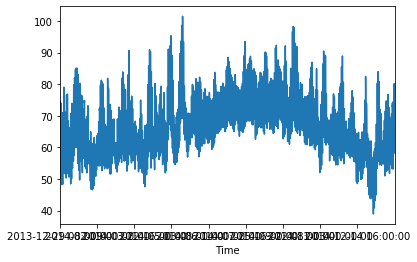

In [207]:
weather_forecast_lax.head(9000)['Temp'].plot()

In [208]:
weather_forecast_lax.head(9000)

,Temp,precipProbability,humidity,windSpeed,visibility
Time,,,,,
2013-12-29 08:00:00,53.28,0.0,0.66,0.92,4.790
2013-12-29 09:00:00,52.30,0.0,0.66,1.07,1.930
2013-12-29 10:00:00,51.61,0.0,0.64,1.02,2.262
2013-12-29 11:00:00,51.51,0.0,0.62,1.25,3.927
2013-12-29 12:00:00,51.62,0.0,0.57,1.55,0.250
...,...,...,...,...,...
2015-01-25 03:00:00,70.24,0.0,0.20,2.23,9.997
2015-01-25 04:00:00,68.27,0.0,0.21,2.81,9.997
2015-01-25 05:00:00,67.86,0.0,0.22,3.21,9.997


In [84]:
weather_forecast_lax.shape

(51147, 5)

In [85]:
weather_forecast_lax.to_csv("weather_forecast_lax.csv")

## Merge forecast data with actual recorded weather data

In [66]:
actual_weather = pd.read_csv("5_station_weather.csv")

In [71]:
weather_forecast_lax.loc["2014-01-01 01:00:00"]

Temp                 63.140
precipProbability     0.000
humidity              0.430
windSpeed             1.930
visibility            9.997
Name: 2014-01-01 01:00:00, dtype: float64

In [74]:
actual_weather.shape

(49377, 56)

In [86]:
weather_forecast_lax

,Temp,precipProbability,humidity,windSpeed,visibility
Time,,,,,
2013-12-29 08:00:00,53.28,0.00,0.66,0.92,4.790
2013-12-29 09:00:00,52.30,0.00,0.66,1.07,1.930
2013-12-29 10:00:00,51.61,0.00,0.64,1.02,2.262
2013-12-29 11:00:00,51.51,0.00,0.62,1.25,3.927
2013-12-29 12:00:00,51.62,0.00,0.57,1.55,0.250
...,...,...,...,...,...
2019-11-21 03:00:00,53.99,0.00,0.66,6.90,9.995
2019-11-21 04:00:00,55.41,0.00,0.67,4.04,9.995
2019-11-21 05:00:00,53.67,0.00,0.76,3.99,9.995


In [75]:
actual_weather

,valid,lon_RIV,lat_RIV,tmpf_RIV,dwpf_RIV,relh_RIV,drct_RIV,sknt_RIV,alti_RIV,mslp_RIV,...,lat_LAX,tmpf_LAX,dwpf_LAX,relh_LAX,drct_LAX,sknt_LAX,alti_LAX,mslp_LAX,vsby_LAX,feel_LAX
0,2014-01-01 01:00:00,-117.25,33.9,62.24,19.76,19.24,280.0,5.0,30.09,1019.2,...,33.9382,60.980000,41.000000,47.700000,260.000000,5.000000,30.090000,1019.000000,10.000000,60.980000
1,2014-01-01 02:00:00,-117.25,33.9,52.70,16.70,23.79,310.0,3.0,30.10,1019.7,...,33.9382,57.920000,48.920000,71.900000,260.000000,7.000000,30.100000,1019.300000,10.000000,57.920000
2,2014-01-01 03:00:00,-117.25,33.9,46.04,21.20,36.98,0.0,0.0,30.11,1020.3,...,33.9382,57.920000,53.960000,86.630000,270.000000,7.000000,30.100000,1019.300000,10.000000,57.920000
3,2014-01-01 04:00:00,-117.25,33.9,44.78,24.08,43.79,280.0,3.0,30.12,1020.4,...,33.9382,57.920000,53.960000,86.630000,0.000000,0.000000,30.120000,1019.800000,10.000000,57.920000
4,2014-01-01 05:00:00,-117.25,33.9,45.32,26.96,48.35,0.0,0.0,30.12,1020.2,...,33.9382,57.020000,53.060000,86.580000,230.000000,4.000000,30.130000,1020.000000,10.000000,57.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49372,2019-11-14 20:00:00,-117.25,33.9,75.70,30.60,19.04,0.0,0.0,30.07,1017.8,...,33.9382,66.928205,54.974359,65.439487,254.615385,6.384615,30.090000,1018.884615,5.769231,82.289290
49373,2019-11-14 21:00:00,-117.25,33.9,78.30,23.40,12.98,0.0,0.0,30.05,1016.9,...,33.9382,67.582051,54.358974,62.600513,260.769231,9.307692,30.076154,1018.297436,8.461538,82.289338
49374,2019-11-14 22:00:00,-117.25,33.9,79.20,33.30,18.91,310.0,8.0,30.04,1016.6,...,33.9382,66.666667,54.666667,65.380000,256.153846,10.384615,30.066154,1018.035897,9.846154,82.289385
49375,2019-11-14 23:00:00,-117.25,33.9,76.30,37.90,24.97,300.0,8.0,30.05,1017.0,...,33.9382,66.000000,55.000000,67.640000,250.000000,10.846154,30.069231,1018.069231,10.000000,82.289431


In [89]:
act_and_fore_wethdata = actual_weather.merge(weather_forecast_lax, left_on='valid',right_index=True,how='left')
final = act_and_fore_wethdata.interpolate()
act_and_fore_wethdata['visibility'].isna().sum() 
final.columns = [j+'_Forecast' if j in final.columns[-5:] else j for j in final.columns]
# final.to_csv("full_weather_data.csv")

In [114]:
final = act_and_fore_wethdata.interpolate()

In [108]:
act_and_fore_wethdata['visibility'].isna().sum() 

516

In [119]:
# change column name -> "temp_LAX"
final.columns = [j+'_Forecast' if j in final.columns[-5:] else j for j in final.columns]

In [121]:
final.to_csv("full_weather_data.csv")

In [126]:
final.columns

Index(['valid', 'lon_RIV', 'lat_RIV', 'tmpf_RIV', 'dwpf_RIV', 'relh_RIV',
       'drct_RIV', 'sknt_RIV', 'alti_RIV', 'mslp_RIV', 'vsby_RIV', 'feel_RIV',
       'lon_TRM', 'lat_TRM', 'tmpf_TRM', 'dwpf_TRM', 'relh_TRM', 'drct_TRM',
       'sknt_TRM', 'alti_TRM', 'mslp_TRM', 'vsby_TRM', 'feel_TRM', 'lon_WJF',
       'lat_WJF', 'tmpf_WJF', 'dwpf_WJF', 'relh_WJF', 'drct_WJF', 'sknt_WJF',
       'alti_WJF', 'mslp_WJF', 'vsby_WJF', 'feel_WJF', 'lon_CQT', 'lat_CQT',
       'tmpf_CQT', 'dwpf_CQT', 'relh_CQT', 'drct_CQT', 'sknt_CQT', 'alti_CQT',
       'mslp_CQT', 'vsby_CQT', 'feel_CQT', 'lon_LAX', 'lat_LAX', 'tmpf_LAX',
       'dwpf_LAX', 'relh_LAX', 'drct_LAX', 'sknt_LAX', 'alti_LAX', 'mslp_LAX',
       'vsby_LAX', 'feel_LAX', 'Temp_Forecast', 'precipProbability_Forecast',
       'humidity_Forecast', 'windSpeed_Forecast', 'visibility_Forecast'],
      dtype='object')

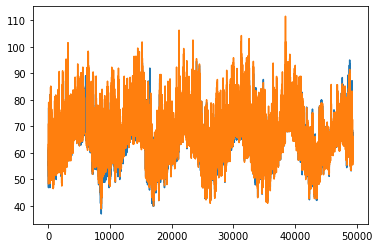

In [128]:
import matplotlib.pyplot as plt
plt.figure()

x = final.index
y1 = final['tmpf_LAX']
y2 = final['Temp_Forecast']

plt.plot(x,y1)
plt.plot(x,y2)